## The Dataset
The dataset used for this project comes from Insideairbnb.com, an anti-Airbnb lobby group that scrapes Airbnb listings, reviews and calendar data for multiple cities around the world. The dataset was scraped on 9 September 2021 and contains information on all Paris Airbnb listings that were live on the site on that date.

## Cleaning and Preprocessing

### Importing the libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [34]:
# import the file

raw_df = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/Paris_listings.csv')
print(f"The dataset contains {len(raw_df)} AirBnb listings.")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 50133 AirBnb listings.


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,20210909211521,2021-09-11,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed studio apartment that mixes old and new aesthetics at the very heart of Paris, on the famous Isle St Louis that is a stone's throw from Le Marais, Quartier Latin, Notre Dame and Le Louvre.<br /><br /><b>The space</b><br />Small, well appointed studio apartment at the very heart of Paris, on the famous Isle St Louis.<br /><br />We are looking for quiet persons or couples to rent our fully equipped studio (about 30 square meters or 300 square feet) in central Paris on the famous Isle St. Louis.<br /><br />No smoking and parties are forbidden<br /><br />The location is superb in heart of Paris and to close to all amenities (buses, metro, velib)<br /><br /><b>Guest access</b><br />The flat includes :<br /> - A redone bathroom <br />- A kitchenette fully equipped (oven, fridge, hob, kitchen utensil, kettle, washing machine...)<br />- A desk<br />- A comfortable sofa-bed<br />- A storage for your stuffs <br />- Wi-Fi<br /><br />Towels, hairdryer a","You are within walking distance to the Louvre, Notre Dame, Le Marais, Les Halles, Chatelet, St. Germain, Les Tuileries, le Jardin des Plantes, St. Michel, Sorbonne, Institut du Monde Arab, the Bastille and the Latin Quarter.",https://a0.muscache.com/pictures/52413/f9bf76f5_original.jpg,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"İstanbul, İstanbul, Turkey",The flat is owned by journalists who spend a lot of time traveling for work who understand what people need when they're away from home. Guillaume and his partners manage arrivals and checkins.. We all love Paris and try to make it easy for people to come and visit the city.,within an hour,100%,89%,f,https://a0.muscache.com/im/users/7903/profile_pic/1280002723/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/7903/profile_pic/1280002723/original.jpg?aki_policy=profile_x_medium,Saint-Paul - Ile Saint-Louis,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'government_id']",t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,NaN,48.85247,2.35835,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Hot water kettle"", ""Cooking basics"", ""Smoke alarm"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Shampoo"", ""Heating"", ""Refrigerator"", ""Shower gel"", ""Essentials"", ""Bed linens"", ""Toaster"", ""Dedicated workspace"", ""Cleaning products"", ""Extra pillows and blankets"", ""Stove"", ""Drying rack for clothing"", ""Clothing storage: closet"", ""Fire extinguisher"", ""Body soap"", ""Cable TV"", ""Kitchen"", ""Hangers"", ""TV w

## Dropping Initial columns
+ drop free text columns
+ drop columns not useful for predicting price

In [35]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since','host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']

df = raw_df.drop(cols_to_drop, axis=1)


#### now check for columns with majority null entries

In [36]:
df.isna().sum()

id                                                  0
host_response_time                              26839
host_response_rate                              26839
host_acceptance_rate                            25900
host_is_superhost                                  34
host_listings_count                                34
host_total_listings_count                          34
host_has_profile_pic                               34
host_identity_verified                             34
neighbourhood                                   20064
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    50133
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       50133
bathrooms_text              

In [37]:

#df.drop(['host_response_time', 'host_response_rate',
        #'host_acceptance_rate','neighbourhood', 'neighbourhood_group_cleansed',
        #'bathrooms','calendar_updated','license', 'first_review', 'last_review',
        #'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
        #'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1, inplace=True)

# set id as index
#df.set_index('id', inplace=True)


In [38]:

lat_long = df[['latitude', 'longitude']]

In [39]:
df.drop(['latitude', 'longitude'],axis=1, inplace=True)

In [40]:
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,within an hour,100%,89%,f,1.0,1.0,t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Hot water kettle"", ""Cooking basics"", ""Smoke alarm"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Shampoo"", ""Heating"", ""Refrigerator"", ""Shower gel"", ""Essentials"", ""Bed linens"", ""Toaster"", ""Dedicated workspace"", ""Cleaning products"", ""Extra pillows and blankets"", ""Stove"", ""Drying rack for clothing"", ""Clothing storage: closet"", ""Fire extinguisher"", ""Body soap"", ""Cable TV"", ""Kitchen"", ""Hangers"", ""TV with standard cable"", ""Wifi"", ""Hair dryer"", ""Dishes and silverware"", ""Host greets you"", ""Washer""]",$110.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,3,29,29,260,35,3,2013-09-22,2020-08-08,4.51,4.55,4.47,4.78,4.82,4.96,4.53,7510402838018,f,1,1,0,0,2.68
1,7397,within an hour,100%,80%,t,4.0,4.0,t,t,NaN,Hôtel-de-Ville,NaN,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Cooking basics"", ""Smoke alarm"", ""Iron"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Shampoo"", ""Heating"", ""Refrigerator"", ""Essentials"", ""Bed linens"", ""Microwave"", ""Dedicated workspace"", ""Extra pillows and blankets"", ""Stove"", ""Cable TV"", ""Kitchen"", ""Hangers"", ""Carbon monoxide alarm"", ""Paid parking off premises"", ""TV with standard cable"", ""Wifi"", ""Coffee maker"", ""Hair dryer"", ""Dishes and silverware"", ""Host greets you"", ""Washer""]",$100.00,10,130,10.0,10.0,130.0,130.0,10.0,130.0,NaN,t,0,0,20,257,278,9,2,2011-08-11,2021-08-18,4.70,4.79,4.44,4.91,4.88,4.92,4.70,7510400829623,f,1,1,0,0,2.26
2,7964,within a day,60%,0%,f,0.0,0.0,t,t,NaN,Opéra,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""TV with standard cable"", ""Wifi"", ""Cable TV"", ""Dedicated workspace"", ""Kitchen"", ""Hangers"", ""Iron"", ""Long term stays allowed"", ""Heating"", ""Washer""]",$130.00,6,365,6.0,6.0,365.0,365.0,6.0,365.0,NaN,t,13,43,73,348,6,0,0,2014-09-11,2015-09-14,4.80,5.00,5.00,5.00,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.07
3,9359,within an hour,100%,20%,f,3.0,3.0,t,t,NaN,Louvre,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""Wifi"", ""Kitchen"", ""Hair dryer"", ""Elevator"", ""Long term stays allowed"", ""Heating""]",$75.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,NaN,t,0,0,0,28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Available with a mobility lease only (""bail mobilité"")",f,1,1,0,0,NaN
4,9952,within an hour,100%,100%,t,1.0,1.0,t,t,"Paris, Ile-de-France, France",Popincourt,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""TV"", ""Cooking basics"", ""Smoke alarm"", ""Luggage dropoff allowed"", ""Iron"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Heating"", ""Refrigerator"", ""Shower gel"", ""Essentials"", ""Bed linens"", ""Microwave"", ""Dedicated workspace"", ""Extra pillows and blanke

In [41]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

1999

In [42]:

df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

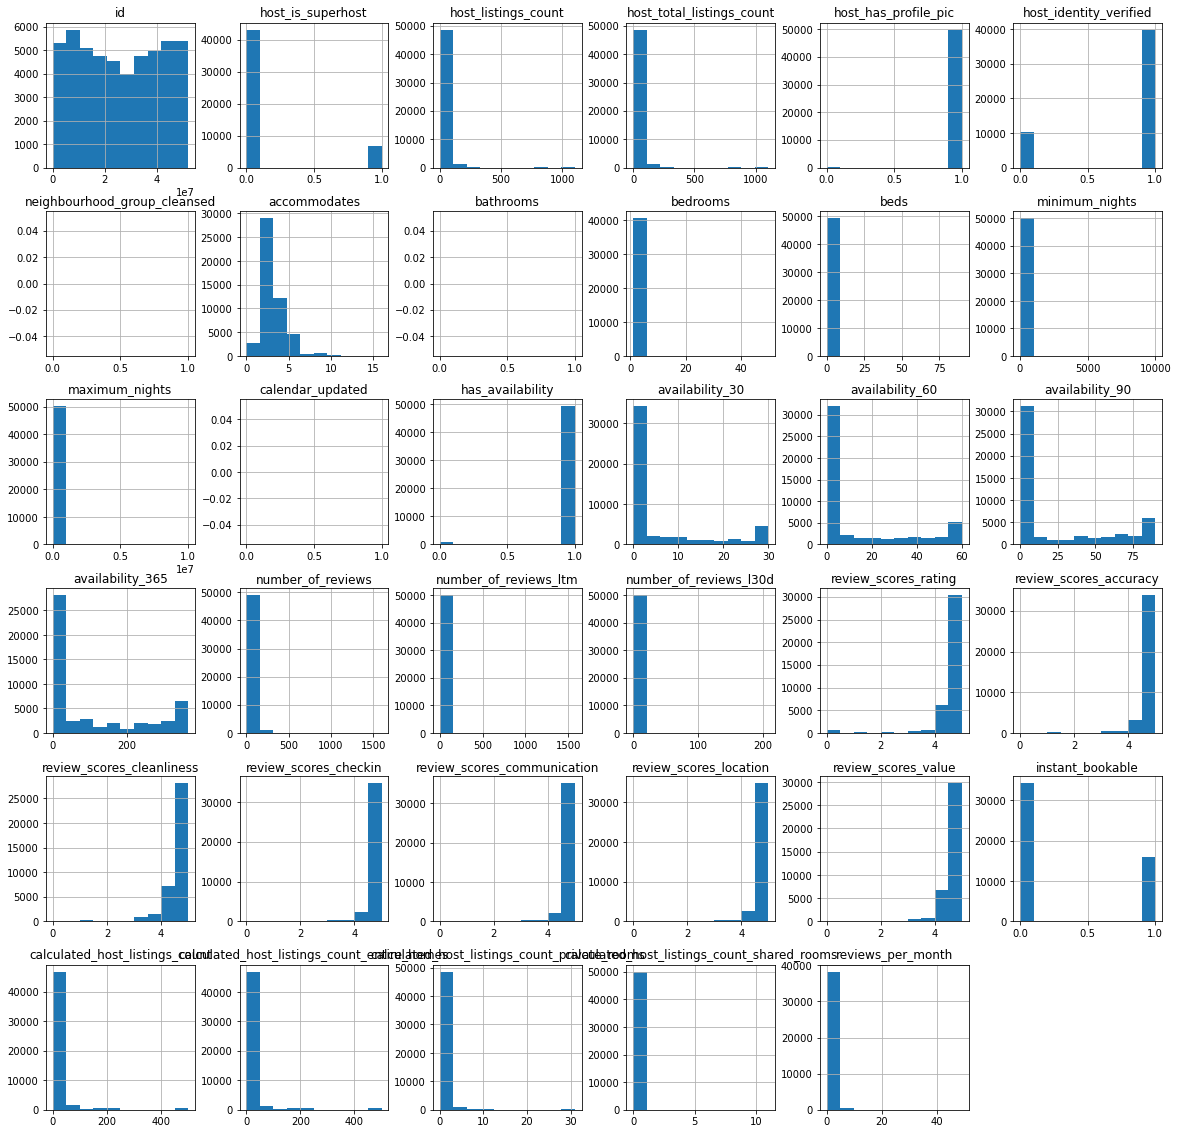

In [43]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [44]:

#df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,within an hour,100%,89%,0.0,1.0,1.0,1.0,1.0,"Paris, Ile-de-France, France",Hôtel-de-Ville,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Hot water kettle"", ""Cooking basics"", ""Smoke alarm"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Shampoo"", ""Heating"", ""Refrigerator"", ""Shower gel"", ""Essentials"", ""Bed linens"", ""Toaster"", ""Dedicated workspace"", ""Cleaning products"", ""Extra pillows and blankets"", ""Stove"", ""Drying rack for clothing"", ""Clothing storage: closet"", ""Fire extinguisher"", ""Body soap"", ""Cable TV"", ""Kitchen"", ""Hangers"", ""TV with standard cable"", ""Wifi"", ""Hair dryer"", ""Dishes and silverware"", ""Host greets you"", ""Washer""]",$110.00,2,1125,NaN,1,0,3,29,29,260,35,3,2013-09-22,2020-08-08,4.51,4.55,4.47,4.78,4.82,4.96,4.53,7510402838018,0,1,1,0,0,2.68
1,7397,within an hour,100%,80%,1.0,4.0,4.0,1.0,1.0,NaN,Hôtel-de-Ville,NaN,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Cooking basics"", ""Smoke alarm"", ""Iron"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Shampoo"", ""Heating"", ""Refrigerator"", ""Essentials"", ""Bed linens"", ""Microwave"", ""Dedicated workspace"", ""Extra pillows and blankets"", ""Stove"", ""Cable TV"", ""Kitchen"", ""Hangers"", ""Carbon monoxide alarm"", ""Paid parking off premises"", ""TV with standard cable"", ""Wifi"", ""Coffee maker"", ""Hair dryer"", ""Dishes and silverware"", ""Host greets you"", ""Washer""]",$100.00,10,130,NaN,1,0,0,20,257,278,9,2,2011-08-11,2021-08-18,4.70,4.79,4.44,4.91,4.88,4.92,4.70,7510400829623,0,1,1,0,0,2.26
2,7964,within a day,60%,0%,0.0,0.0,0.0,1.0,1.0,NaN,Opéra,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""TV with standard cable"", ""Wifi"", ""Cable TV"", ""Dedicated workspace"", ""Kitchen"", ""Hangers"", ""Iron"", ""Long term stays allowed"", ""Heating"", ""Washer""]",$130.00,6,365,NaN,1,13,43,73,348,6,0,0,2014-09-11,2015-09-14,4.80,5.00,5.00,5.00,5.00,5.00,5.00,7510903576564,0,1,1,0,0,0.07
3,9359,within an hour,100%,20%,0.0,3.0,3.0,1.0,1.0,NaN,Louvre,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""Wifi"", ""Kitchen"", ""Hair dryer"", ""Elevator"", ""Long term stays allowed"", ""Heating""]",$75.00,180,365,NaN,1,0,0,0,28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Available with a mobility lease only (""bail mobilité"")",0,1,1,0,0,NaN
4,9952,within an hour,100%,100%,1.0,1.0,1.0,1.0,1.0,"Paris, Ile-de-France, France",Popincourt,NaN,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""TV"", ""Cooking basics"", ""Smoke alarm"", ""Luggage dropoff allowed"", ""Iron"", ""Oven"", ""Long term stays allowed"", ""Hot water"", ""Heating"", ""Refrigerator"", ""Shower gel"", ""Essentials"", ""Bed linens"", ""Microwave"", ""Dedicated workspace"", ""Extra pillows and blankets"", ""Stove"", ""First aid kit"", ""Kitchen"", ""Hangers"", ""Paid parking off premises"", ""Wifi"", ""Coffee maker"", ""Hair dryer"", ""Dishes and silverware"", ""Host greets you""]",$80.00,4,31,NaN,1,1,2,2,198,31,6,1,2016-08-04,2021-06-

## Description of each column:

+ experiences_offered - slightly unclear as it does not appear to directly 
+ relate to Airbnb Experiences, but this seems to be the main recommended category of travel type, e.g. business
+ host_since - date that the host first joined Airbnb
+ host_response_time - average amount of time the host takes to reply to messages
+ host_response_rate - proportion of messages that the host replies to
+ host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
+ host_listings_count - how many listings the host has in total
+ host_identity_verified - whether or not the host has been verified with id
+ neighbourhood_cleansed - the London borough the property is in
+ property_type - type of property, e.g. house or flat
+ room_type - type of listing, e.g. entire home, private room or shared room
+ accommodates - how many people the property accommodates
+ bathrooms - number of bathrooms
+ bedrooms - number of bedrooms
+ beds - number of beds
+ bed_type - type of bed, e.g. real bed or sofa-bed
+ amenities - list of amenities
+ price - nightly advertised price (the target variable)
+ security_deposit - the amount required as a security deposit
+ cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
+ guests_included - the number of guests included in the booking fee
+ extra_people - the price per additional guest above the guests_included price
+ minimum_nights - the minimum length of stay
+ maximum_nights - the maximum length of stay
+ calendar_updated - when the host last updated the calendar
+ availability_30 - how many nights are available to be booked in the next 30 days
+ availability_60 - how many nights are available to be booked in the next 60 days
+ availability_90 - how many nights are available to be booked in the next 90 days
+ availability_365 - how many nights are available to be booked in the next 365 days
+ number_of_reviews - the number of reviews left for the property
+ number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
+ first_review - the date of the first review
+ last_review - the date of the most recent review
+ review_scores_rating - guests can score properties overall from 1 to 5 stars
+ review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
+ review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
+ review_scores_checkin - guests can score their check-in from 1 to 5 stars
+ review_scores_communication - guests can score a host's communication from 1 to 5 stars
+ review_scores_location - guests can score a property's location from 1 to 5 stars
+ review_scores_value - guests can score a booking's value for money from 1 to 5 stars
+ instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
+ cancellation_policy - the type of cancellation policy, e.g. strict or moderate
+ reviews_per_month - calculated field of the average number of reviews left by guest each month

In [45]:
df.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'calculated_host_listings_count',

## Cleaning Individual Columns

### host_response_time
Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'

In [46]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Percent: {round((df.host_response_time.isna().sum()/len(df))*100,1)}%")

# number of rows without a value, and alsomm no review
len(df[df.loc[:,['host_response_time','first_review']].isnull().sum(axis=1) == 2])

Null values: 26839
Percent: 53.5%


7221

### host__response_rate
+ about 1/3 of values are nulll
+ Because about 70% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins

In [48]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Percent: {round((df.host_response_rate.isna().sum()/len(df))*100,1)}%")

Null values: 26839
Percent: 53.5%


In [49]:
# Remove the % sign from the host_response_rate string
# convert to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 89.0
Median host response rate: 100.0
Proportion of 100% host response rates: 62.1%


In [50]:

# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()


unknown    26839
100%       14460
50-89%      3735
90-99%      3145
0-49%       1954
Name: host_response_rate, dtype: int64